<a href="https://colab.research.google.com/github/SandySingh72/DATA_Analytics/blob/main/TF_Regression_with_IRIS_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
iris = pd.read_csv("iris.csv")
iris['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [3]:
ohe_y = pd.get_dummies(iris['Species'])
X = iris.drop('Species', axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split( X, ohe_y, test_size=0.3, random_state=25,
                                                    stratify=iris['Species'] )

In [5]:
scaler = MinMaxScaler().set_output(transform='pandas')
X_trn_scl = scaler.fit_transform(X_train)
X_tst_scl = scaler.transform(X_test)

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(15, kernel_initializer=tf.keras.initializers.LecunNormal(seed=25),
                          bias_initializer=tf.keras.initializers.Zeros(), activation="relu"),
    tf.keras.layers.Dense(10, kernel_initializer=tf.keras.initializers.LecunNormal(seed=25),
                          bias_initializer=tf.keras.initializers.Zeros(), activation="relu"),
    tf.keras.layers.Dense(5, kernel_initializer=tf.keras.initializers.LecunNormal(seed=25),
                          bias_initializer=tf.keras.initializers.Zeros(), activation="relu"),
    tf.keras.layers.Dense(3, kernel_initializer=tf.keras.initializers.LecunNormal(seed=25),
                          bias_initializer=tf.keras.initializers.Zeros(),
                          activation='softmax')
])
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 15)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 308 (1.20 KB)

 Trainable params: 308 (1.20 KB)

 Non-trainable params: 0 (0.00 B)

None


In [17]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss= tf.keras.losses.CategoricalCrossentropy()  ,metrics=['acc'])

In [18]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001, restore_best_weights=True)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy() ,metrics=['acc'])

In [19]:
history = model.fit( X_trn_scl, y_train, validation_data=(X_tst_scl, y_test), epochs=1000, callbacks=[early])

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - acc: 0.3257 - loss: 0.6981 - val_acc: 0.3333 - val_loss: 0.6977
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - acc: 0.3819 - loss: 0.6926 - val_acc: 0.3556 - val_loss: 0.6925
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - acc: 0.3722 - loss: 0.6875 - val_acc: 0.2889 - val_loss: 0.6878
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - acc: 0.3181 - loss: 0.6835 - val_acc: 0.2222 - val_loss: 0.6834
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - acc: 0.3521 - loss: 0.6792 - val_acc: 0.2222 - val_loss: 0.6794
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - acc: 0.3343 - loss: 0.6766 - val_acc: 0.1778 - val_loss: 0.6752
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - acc: 0.3940 - loss: 0.6725 - val_acc: 0.2222 - val_loss: 0.6714
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - acc: 0.3986 - loss: 0.6682 - val_acc: 0.2000 - val_loss: 0.6675
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - acc: 0.319

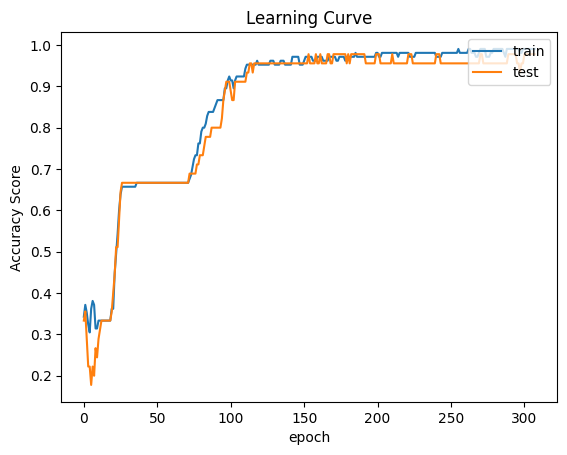

In [20]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Learning Curve')
plt.ylabel('Accuracy Score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

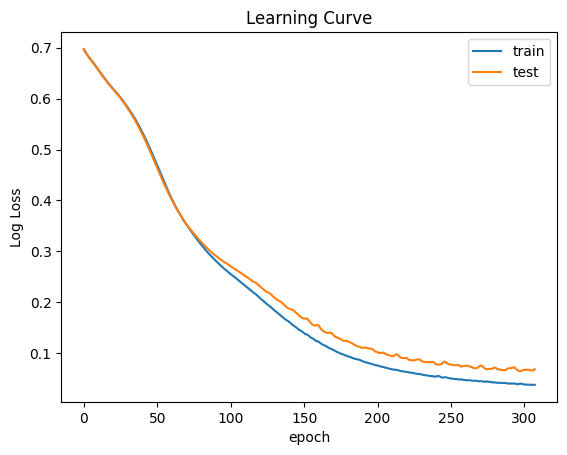

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Learning Curve')
plt.ylabel('Log Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()